# BANK STOCK PROJECT

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice

In [2]:
#Import modules
from pandas.util.testing import assert_frame_equal
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [3]:
#Getting data using pandas_datareader
#Getting stockData for the following banks
#Bank of America
#CitiGroup
#Goldman Sachs
#JPMorgan Chase
#Wells Fargo


#Aim is to check the rate in changes after the financial crisis. 

In [4]:
#Using datetime to set the start and stop for the period
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [5]:
#Using stock ticker to get the stock for the period

#For Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
#For CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
#For Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
#For JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
#For Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [6]:
BAC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801


In [7]:
C.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,440.882477
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,432.742950


In [8]:
GS.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.574997
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089142


In [9]:
JPM.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.529718
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,27.370821


In [10]:
WFC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975,31.195,31.600000,31.900000,11016400.0,20.408512
2006-01-04,31.820,31.365,31.799999,31.530001,10870000.0,20.171795


In [11]:
#List of the ticker symbols
ticker = ['BAC', 'C','GS','JPM','WFC']

In [12]:
#concatenating the dataframs together
bank_stock = pd.concat([BAC,C,GS,JPM,WFC],axis=1,keys=ticker)

In [13]:
#bank_stock.head(2)

In [14]:
#setting column names
bank_stock.columns.names = ['Bank ticker','Stock Info']

In [15]:
bank_stock.head(2)

Bank ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   

Bank ticker        JPM                                       WFC          \
Stock Info        Open      Close      Volume  Adj Close    High     Low   
Date                                                                       
2006-01-03   39.830002  40.189999  12838600.0  27.529718  31.975  31.195   
2006-01-04   39.779999  39.619999  13491500.0  27.370821  31.820  31.365   

Bank ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  

[2 rows x 30 columns]

# Exploratory Data analysis (EDA)

In [16]:
#Getting the Maximum Closing prices of stocks
bank_stock.xs(key='Close',axis=1,level='Stock Info').max()

Bank ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
WFC     58.520000
dtype: float64

In [17]:
#Calculating Returns for each stock
#This would be done by calculating the percentage change method in pandas

#creating an empty dataframe
returns = pd.DataFrame()

In [18]:
#using pandas .pct_change() rate of percentage change
for tick in ticker:
    returns[tick + 'Returns'] = bank_stock[tick]['Close'].pct_change()

In [19]:
returns.head(5)

,BACReturns,CReturns,GSReturns,JPMReturns,WFCReturns
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.000158


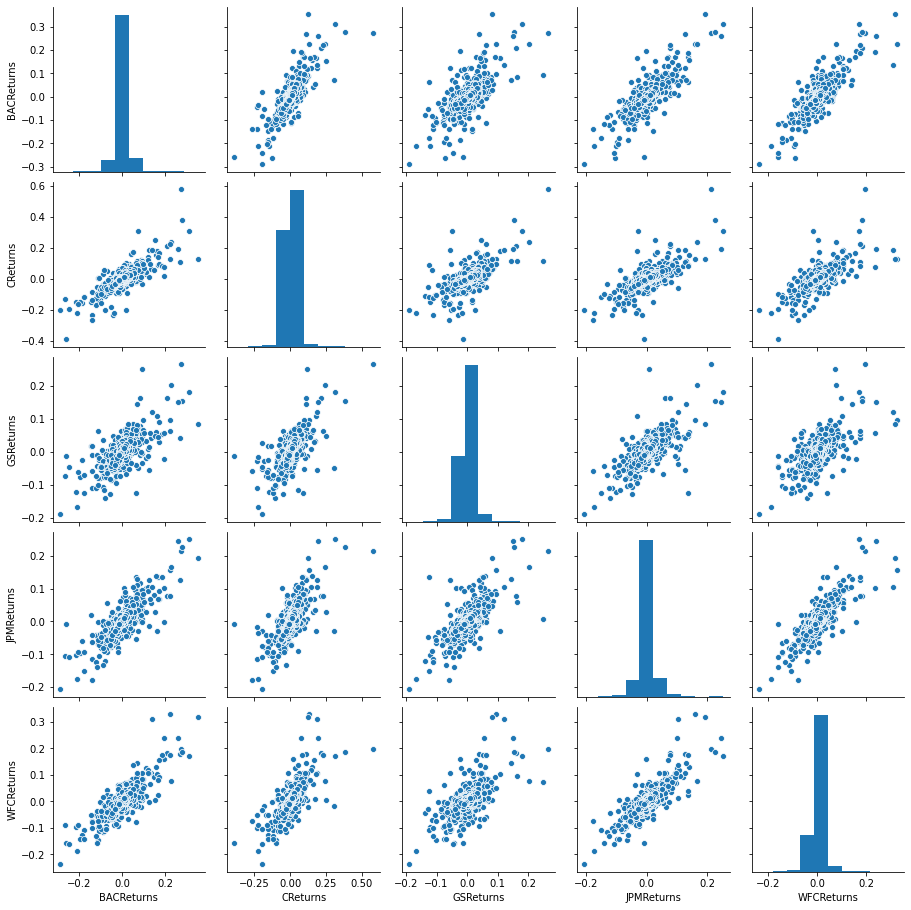

In [20]:
#creating a pairplot for returns
sb.pairplot(returns[1:])

In [21]:
#checking out the lowest returns date for each Bank
returns.idxmin()

BACReturns   2009-01-20
CReturns     2009-02-27
GSReturns    2009-01-20
JPMReturns   2009-01-20
WFCReturns   2009-01-20
dtype: datetime64[ns]

In [22]:
#checking out the Highest returns date for each Bank
returns.idxmax()

BACReturns   2009-04-09
CReturns     2008-11-24
GSReturns    2008-11-24
JPMReturns   2009-01-21
WFCReturns   2008-07-16
dtype: datetime64[ns]

In [23]:
#Getting the standard deviation for returns
returns.std()

BACReturns    0.036647
CReturns      0.038672
GSReturns     0.025390
JPMReturns    0.027667
WFCReturns    0.030238
dtype: float64

In [24]:
#Getting the standard deviation for a particular year.205
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturns    0.016163
CReturns      0.015289
GSReturns     0.014046
JPMReturns    0.014017
WFCReturns    0.012591
dtype: float64

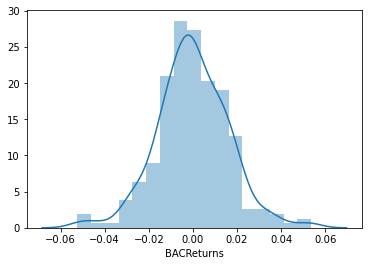

In [25]:
#creating a distributionplot for BAC for 2015 returns

sb.distplot(returns.loc['2015-01-01':'2015-12-31']['BACReturns'])

plt.show()

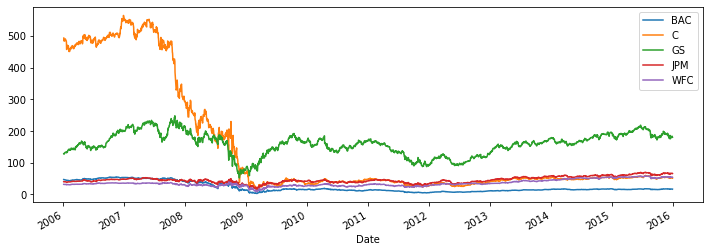

In [26]:
#Creating a line plot showing Close prices for each bank for the entire DataFrame
#Using a for loop

for tick in ticker:
    bank_stock[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()
plt.show()

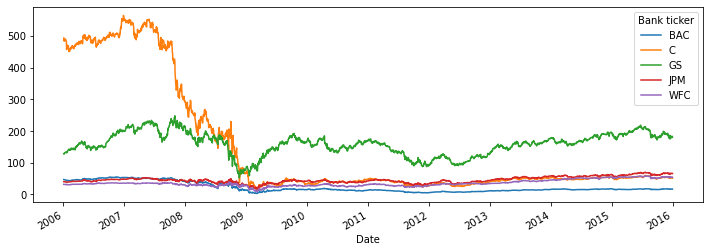

In [27]:
#Creating a line plot showing Close prices for each bank for the entire DataFrame
#using slicing

bank_stock.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))
plt.show()

In [28]:
bank_stock.xs(key='Close',axis=1,level='Stock Info').iplot()

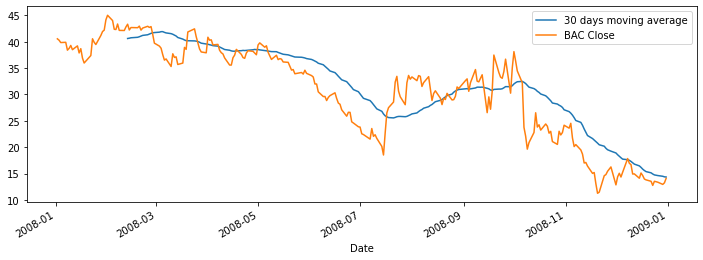

In [38]:
#claculating the moving average for BAC-2008
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 days moving average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.show()

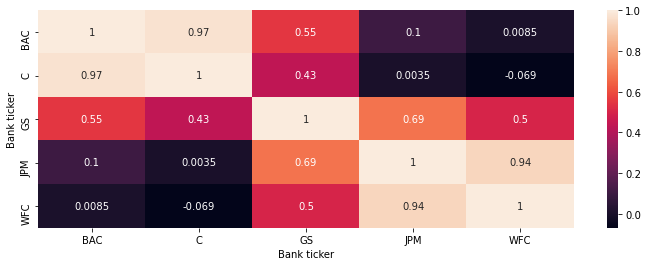

In [45]:
#Ploting the Heatmap for the correlation 
plt.figure(figsize=(12,4))
sb.heatmap(bank_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

In [48]:
close_corr = bank_stock.xs(key='Close',axis=1,level='Stock Info').corr()

In [49]:
close_corr.iplot(kind='heatmap')

In [54]:
BAC.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.18,46.150002,46.919998,47.080002,16296700.0,35.298687


In [55]:
Bac_candle = BAC[['High','Low','Open','Close']].loc['2015-01-01':'2016-01-01']
Bac_candle.iplot(kind='candle')